<a href="https://colab.research.google.com/github/Gerardomn/TCD/blob/master/TCD_Session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de python, ciencia de datos

In [0]:
url_datos="https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/dataTaller.json"

copiar los datos con Raw y hacer las graficas

In [0]:
url_datos

'https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/dataTaller.json'

In [0]:
import pandas as pd 

In [0]:
import urllib.request, json

In [0]:
def getDatos(urld):
  import urllib.request, json
  with urllib.request.urlopen(urld) as url:
    return json.loads(url.read().decode())

In [0]:
tiempo, aceleracion = getDatos(url_datos)

In [0]:
tiempo

[0.0,
 0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001,
 0.75,
 0.8,
 0.8500000000000001,
 0.9,
 0.9500000000000001,
 1.0,
 1.05,
 1.1,
 1.1500000000000001,
 1.2000000000000002,
 1.25,
 1.3,
 1.35,
 1.4000000000000001,
 1.4500000000000002,
 1.5,
 1.55,
 1.6,
 1.6500000000000001,
 1.7000000000000002,
 1.75,
 1.8,
 1.85,
 1.9000000000000001,
 1.9500000000000002,
 2.0,
 2.0500000000000003,
 2.1,
 2.15,
 2.2,
 2.25,
 2.3000000000000003,
 2.35,
 2.4000000000000004,
 2.45,
 2.5,
 2.5500000000000003,
 2.6,
 2.6500000000000004,
 2.7,
 2.75,
 2.8000000000000003,
 2.85,
 2.9000000000000004,
 2.95,
 3.0,
 3.0500000000000003,
 3.1,
 3.1500000000000004,
 3.2,
 3.25,
 3.3000000000000003,
 3.35,
 3.4000000000000004,
 3.45,
 3.5,
 3.5500000000000003,
 3.6,
 3.6500000000000004,
 3.7,
 3.75,
 3.8000000000000003,
 3.85,
 3.9000000000000004,
 3.95,
 4.0,
 4.05,
 4.1000000000000005,
 4.15,
 

In [0]:
t = pd.Series(tiempo)
t

0       0.00
1       0.05
2       0.10
3       0.15
4       0.20
       ...  
995    49.75
996    49.80
997    49.85
998    49.90
999    49.95
Length: 1000, dtype: float64

In [0]:
df=pd.DataFrame(aceleracion, columns=["ax","ay","az"])

In [0]:
df

,ax,ay,az
0,0.138292,-0.211310,-0.967586
1,0.179620,-0.267817,-0.946578
2,0.163257,-0.217534,-0.962303
3,0.144201,-0.221116,-0.964528
4,0.135128,-0.208407,-0.968662
...,...,...,...
995,-0.071770,-0.072398,-0.994790
996,-0.071769,-0.072406,-0.994790
997,-0.071789,-0.072461,-0.994784
998,-0.071786,-0.072469,-0.994784


In [0]:
df['t']= t

In [0]:
df.head()

,ax,ay,az,t
0,0.138292,-0.211310,-0.967586,0.00
1,0.179620,-0.267817,-0.946578,0.05
2,0.163257,-0.217534,-0.962303,0.10
3,0.144201,-0.221116,-0.964528,0.15
4,0.135128,-0.208407,-0.968662,0.20


In [0]:
df.tail()

,ax,ay,az,t
995,-0.071770,-0.072398,-0.994790,49.75
996,-0.071769,-0.072406,-0.994790,49.80
997,-0.071789,-0.072461,-0.994784,49.85
998,-0.071786,-0.072469,-0.994784,49.90
999,-0.071810,-0.072493,-0.994780,49.95


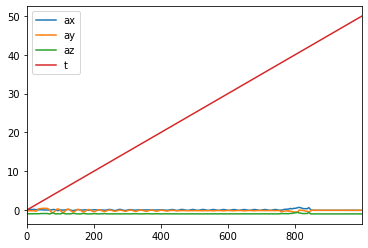

In [0]:
df.plot()

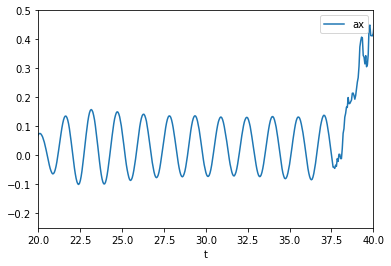

In [0]:
df.plot(x='t',y='ax', xlim=[20,40], ylim=[-0.25,0.5]);

CREAR UN NUEVO CONJUNTO DE DATOS QUE SÓLO CONTENGAN LOS DATOS ANTERIORES

DATOS BOOLEANOS

In [0]:
roi=df.loc[(df['t'] > 20) & (df['t'] < 37.5), ['t','ax']]

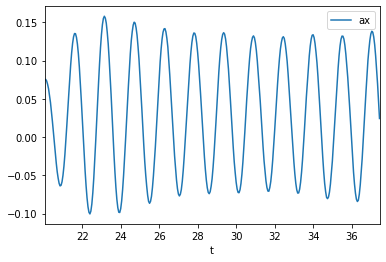

In [0]:
roi.plot(x='t',y='ax');

In [0]:
roi['ax'].max

<bound method Series.max of 401    0.074988
402    0.075363
403    0.073389
404    0.068959
405    0.063095
         ...   
745    0.105895
746    0.087930
747    0.069328
748    0.047252
749    0.024212
Name: ax, Length: 349, dtype: float64>

In [0]:
from scipy.signal import find_peaks 
import numpy as np

In [0]:
z = roi.values[:,1]
peaks, _ = find_peaks(z,height=0)

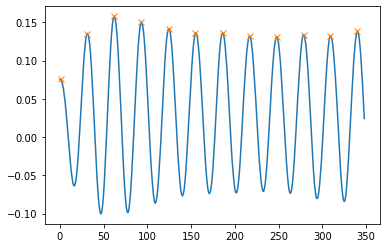

In [0]:
plt.plot(z)
plt.plot(peaks,z[peaks],"x")

In [0]:
peaks #indices de los máximos

array([  1,  31,  62,  93, 125, 155, 186, 217, 248, 279, 309, 340])

In [0]:
z[peaks]

array([0.07536323, 0.1352673 , 0.15787037, 0.15012343, 0.1416914 ,
       0.13594584, 0.13640572, 0.13219601, 0.13113771, 0.13369119,
       0.13189238, 0.13827965])

In [0]:
t_periodos = roi.values[:,0][peaks]
print(t_periodos)

[20.1  21.6  23.15 24.7  26.3  27.8  29.35 30.9  32.45 34.   35.5  37.05]


In [0]:
periodos = np.diff(t_periodos)

In [0]:
print(periodos)

[1.5  1.55 1.55 1.6  1.5  1.55 1.55 1.55 1.55 1.5  1.55]


**RETO: Obtener periodos usando los valores mínimos**

In [0]:
roi

,t,ax
401,20.05,0.074988
402,20.10,0.075363
403,20.15,0.073389
404,20.20,0.068959
405,20.25,0.063095
...,...,...
745,37.25,0.105895
746,37.30,0.087930
747,37.35,0.069328
748,37.40,0.047252


In [0]:
roi.min(axis=1)

401    0.074988
402    0.075363
403    0.073389
404    0.068959
405    0.063095
         ...   
745    0.105895
746    0.087930
747    0.069328
748    0.047252
749    0.024212
Length: 349, dtype: float64

In [0]:
import numpy as np

In [0]:
from scipy import signal

In [0]:
l = roi.values[:,1]

In [0]:
# Find valleys(min).
valley_indexes = signal.argrelextrema(l, np.less)
valley_indexes = valley_indexes[0]

In [0]:
import matplotlib.pyplot as plt

In [0]:
# Plot main graph.
(fig, ax) = plt.subplots()
ax.plot(t, ax)

TAREA:Importar datos con Raw y hacer las graficas del archivo pendulo_exp.csv

In [0]:
url_pendulo="https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/pendulo_exp.csv"

In [0]:
url_pendulo

'https://raw.githubusercontent.com/htapia/TallerPythonIntroCienciaDatos/ciia/notebooks/data/pendulo_exp.csv'

In [0]:
import pandas as pd

In [0]:
import requests, io

In [0]:
p=requests.get(url_pendulo).content

In [0]:
pendulo=pd.read_csv(io.StringIO(p.decode('utf-8')))

In [0]:
pendulo

,Unnamed: 0,L,T1,T2,T3,T4,T5,ave,unc
0,0,26.4,1.09,1.13,1.08,1.06,1.09,1.09,0.04
1,1,35.4,1.33,1.27,1.32,1.25,1.22,1.28,0.05
2,2,38.7,1.33,1.36,1.41,1.33,1.25,1.34,0.08
3,3,46.6,1.46,1.40,1.34,1.45,1.29,1.39,0.10
4,4,52.2,1.64,1.57,1.56,1.55,1.60,1.58,0.05
5,5,57.3,1.55,1.50,1.68,1.55,1.58,1.57,0.10
6,6,63.2,1.64,1.64,1.70,1.82,1.74,1.71,0.11
7,7,72.4,1.85,1.78,1.82,1.80,1.82,1.81,0.04
8,8,86.5,1.92,1.92,1.94,1.95,1.95,1.94,0.02


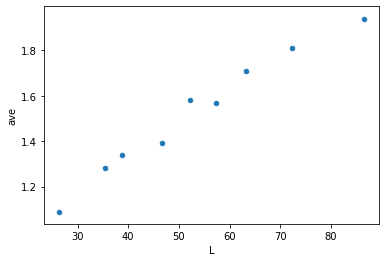

In [0]:
pendulo.plot(kind='scatter',x='L',y='ave')

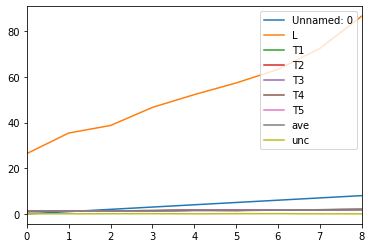

In [0]:
pendulo.plot()

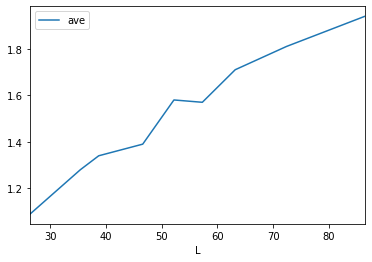

In [0]:
pendulo.plot(x='L',y='ave');

**Generando las variables que se usarán para el modelo de regresión**

In [0]:
x = pendulo["L"] #var independientes o de entrada

In [0]:
y = pendulo["ave"] #objetivos

**MODELO AUTOMATICO DE REGRESION LINEAL**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression() #se crea una isntancia

In [0]:
regresion = lr.fit(x,y)

ValueError: ignored

**modificar dimension de entrada, porque se requieren elementos de dimension 2**

In [0]:
type(x)

pandas.core.series.Series

In [0]:
x = pendulo.pop("L").values.reshape(-1,1) #saca pop los valores numericos como un arreglo de numpy

In [0]:
x

array([[26.4],
       [35.4],
       [38.7],
       [46.6],
       [52.2],
       [57.3],
       [63.2],
       [72.4],
       [86.5]])

In [0]:
y = pendulo.pop("ave").values.reshape(-1,1)

In [0]:
regresion = lr.fit(x,y)

In [0]:
regresion

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
regresion.coef_ #pendiente

array([[0.01416785]])

In [0]:
regresion.intercept_ #ordenada al origen

array([0.76976093])

In [0]:
y_pred = lr.predict(x)

GRAFICA

In [0]:
y_pred

In [0]:
y

In [0]:
import matplotlib.pyplot as plt


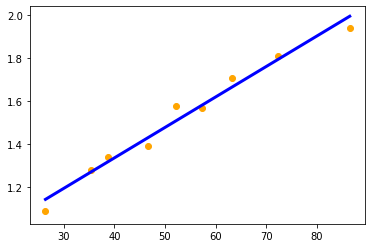

In [0]:
plt.scatter(x,y,color='orange')
plt.plot(x,y_pred, color='blue',linewidth=3)

In [0]:
print("pendiente = {}, \nordenada={}".format(regresion.coef_, regresion.intercept_))

pendiente = [[0.01416785]], 
ordenada=[0.76976093]


**Ecuacion maestra**

In [0]:
import numpy as np

In [0]:
n=x.shape[0]
m=x.shape[1]

X = np.append(np.ones(n).reshape(-1,1),x,axis=1)
X

array([[ 1. , 26.4],
       [ 1. , 35.4],
       [ 1. , 38.7],
       [ 1. , 46.6],
       [ 1. , 52.2],
       [ 1. , 57.3],
       [ 1. , 63.2],
       [ 1. , 72.4],
       [ 1. , 86.5]])

In [0]:
X.shape

(9, 2)

In [0]:
Xt = X.transpose()
Xt

array([[ 1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ,  1. ],
       [26.4, 35.4, 38.7, 46.6, 52.2, 57.3, 63.2, 72.4, 86.5]])

In [0]:
M = Xt.dot(X)

In [0]:
M.shape

(2, 2)

In [0]:
Mi = np.linalg.inv(M)

In [0]:
Mi.dot(M)

array([[1.00000000e+00, 2.49106291e-15],
       [4.38256452e-18, 1.00000000e+00]])

In [0]:
Mi.dot(Xt).dot(y)

array([[0.76976093],
       [0.01416785]])